In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import resample


In [305]:
df = pd.read_csv("wine.data", names = cols)

In [303]:
cols= [
    "class",
    "Alcohol",
    "Malicacid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "diluted_wines",
    "Proline"
]



In [307]:
df

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


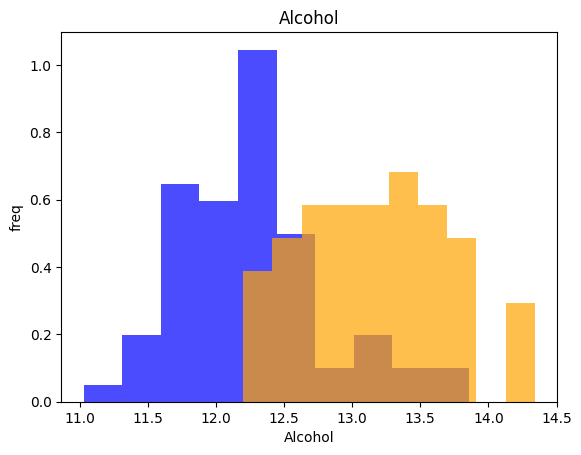

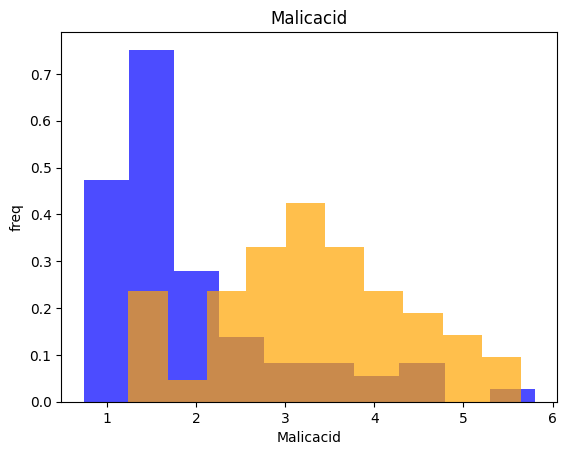

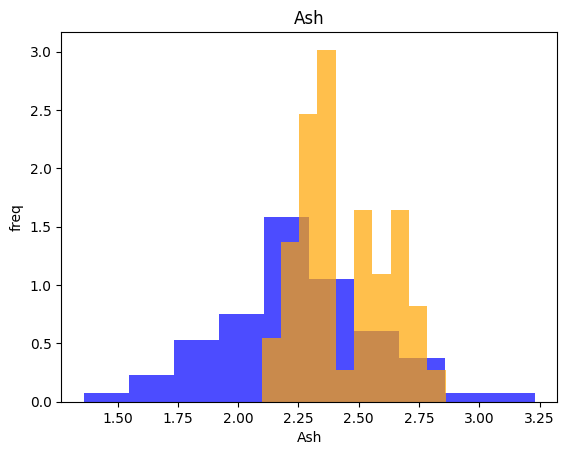

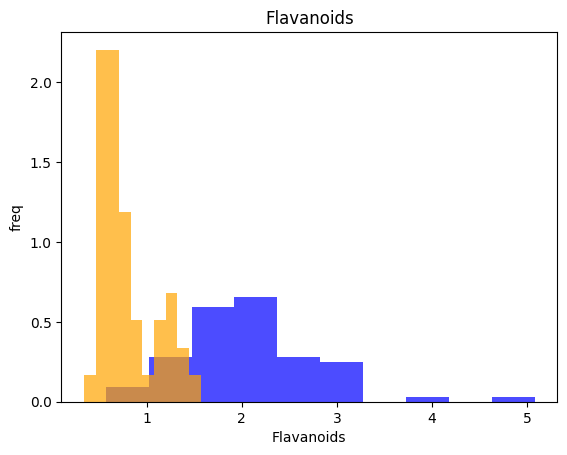

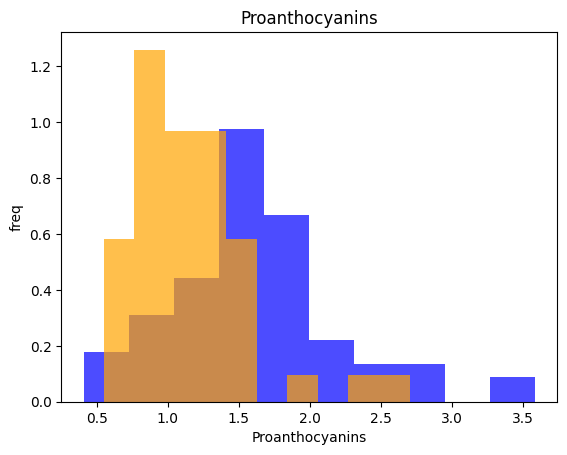

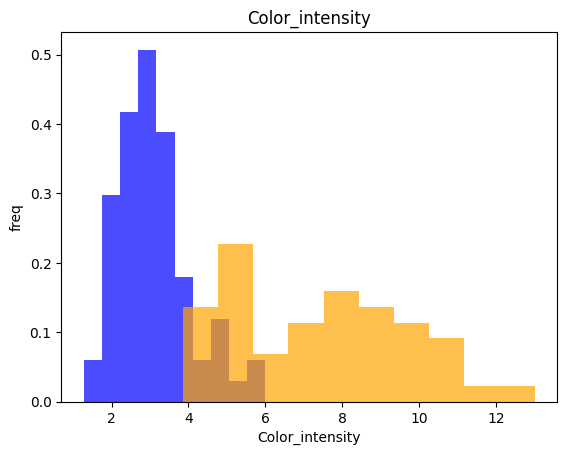

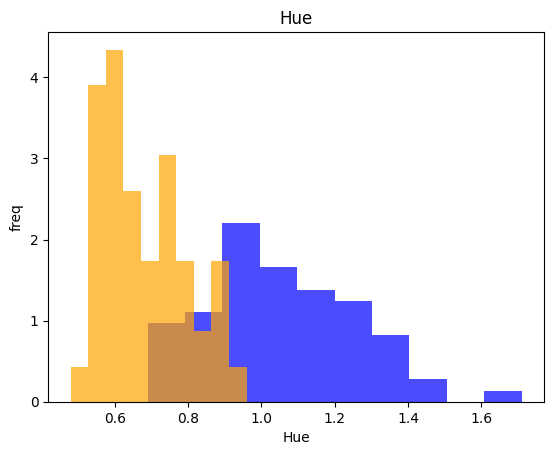

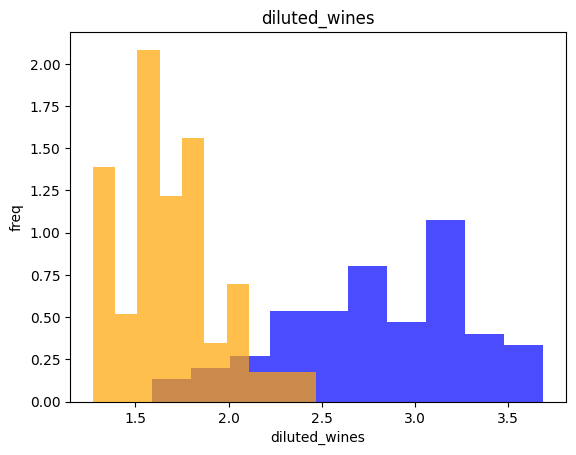

In [429]:
for label in list(df.columns)[1:]:
    #plt.hist(df[df["class"]==1][label],color= 'r', alpha = 0.7, density = True)
    plt.hist(df[df["class"]==2][label],color= 'b', alpha = 0.7, density = True)
    plt.hist(df[df["class"]==3][label],color= 'orange', alpha = 0.7, density = True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("freq")
    plt.show()

In [427]:
#df= df.drop(["Total_phenols"],axis =1)

In [431]:
#df[df["class"]==1].count()
df_1 = df[df['class'] == 1]
df_2 = df[df['class'] == 2]
df_3 = df[df['class'] == 3]

d_1= resample(df_1, replace = False, n_samples=48, random_state=42)
d_1= resample(df_2, replace = False, n_samples=48, random_state=42)
d_1= resample(df_3, replace = False, n_samples=48, random_state=42)

In [433]:
df_bal = pd.concat([d_1, d_2, d_3])
df_bal = df_bal.sample(frac=1, random_state=42)

In [435]:
train, test = np.split(df_bal, [int(0.7*len(df_bal))])

D:\Conda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [437]:
X_train, y_train = train.drop("class", axis =1), train["class"]
X_test, y_test = test.drop("class", axis =1), test["class"]

In [439]:
from sklearn.neighbors import KNeighborsClassifier

In [465]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [467]:
y_pred = knn_model.predict(X_test)

In [469]:
from sklearn.metrics import classification_report

In [323]:
print(classification_report(y_test, y_pred)) #with all features

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       0.77      0.56      0.65        18
           3       0.65      0.76      0.70        17

    accuracy                           0.73        44
   macro avg       0.75      0.77      0.75        44
weighted avg       0.73      0.73      0.72        44



In [473]:
print(classification_report(y_test, y_pred)) # after removing some features

              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        17

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



In [ ]:
##Unseen Samples

In [475]:
df_n = df.loc[~df.index.isin(df_bal.index)]

In [481]:
_2X_test, _2y_test = df_n.drop("class", axis =1), df_n["class"]

In [483]:
pred = knn_model.predict(_2X_test)

In [ ]:
print(classification_report(_2y_test, pred, zero_division=1))

In [501]:
dropped = set(cols) and set(df.columns)
dropped

{'Alcohol',
 'Ash',
 'Color_intensity',
 'Flavanoids',
 'Hue',
 'Malicacid',
 'Proanthocyanins',
 'class',
 'diluted_wines'}

In [ ]:
#After Dropping these columns as there were many overlapping between them across the classes as seen in the histogram